In [1]:
from SGDRegressor import SGDRegressor
from optimizer import BaseOptimizer, Momentum, Nesterov, AdaGrad, RMSProp, Adam
from utils import read_data, plot_log
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
X, y = read_data()

## 1. Реализовать стохастический градиентный спуск для решения линейной регрессии. Исследовать сходимость с разным размером батча (1- SGD, 2..n-1 Minibatch GD, n - GD из предыдущей работы).

In [3]:
iter_counts = []
errors = []
elapsed_times = []
for batch_size in tqdm(range(1, 101, 10)):
    sgd = SGDRegressor(batch_size=batch_size, optimizer=BaseOptimizer())
    sgd.fit(X, y, plot_errors=False)
    iter_counts.append(sgd.iterations)
    errors.append(sgd.best_error)
    elapsed_times.append(sgd.calculation_time)

  0%|          | 0/10 [00:00<?, ?it/s]

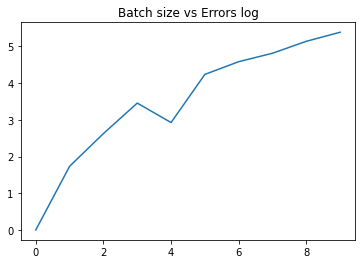

In [4]:
plot_log(errors, 'Batch size vs Errors log')

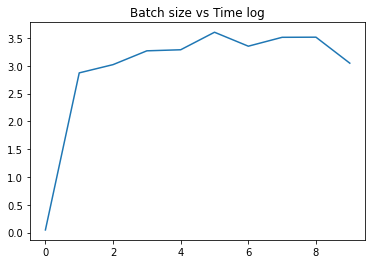

In [5]:
plot_log(elapsed_times, 'Batch size vs Time log')

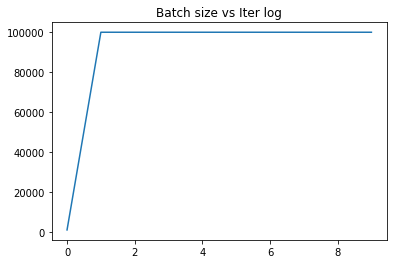

In [6]:
plot_log(iter_counts, 'Batch size vs Iter log')

## 2. Исследовать влияние предварительной нормализации данных (scaling) на сходимость.

## 3. Исследовать модификации градиентного спуска (Nesterov, Momentum, AdaGrad, RMSProp, Adam).

/Users/sashapff/itmo/optimization-methods/lab2/optimizer.py:21: RuntimeWarning: invalid value encountered in subtract
  self.diff = self.alpha * self.diff - self.beta * gradient


array([[nan, nan, nan]])

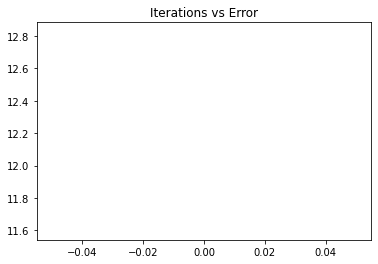

## 4. Исследуйте сходимость алгоритмов. Сравнить различные методы по скорости сходимости, надежности, требуемым машинным ресурсам (объем оперативной памяти, количеству арифметических операций, времени выполнения)

## 5. Построить траекторию спуска различных алгоритмов из одной и той же исходной точки с одинаковой точностью. В отчете наложить эту траекторию на рисунок с линиями равного уровня заданной функции.